In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from os.path import isfile, join
from tensorflow import keras

In [2]:
plt.style.use('ggplot')
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'

In [3]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [6]:
df = df.drop(['AverageTemperatureUncertainty'], axis=1)

In [7]:
data_by_continents = df[df.Country == 'Asia']
data_by_continents.append(df[df.Country == 'Europe'])
data_by_continents.append(df[df.Country == 'Africa'])
data_by_continents.append(df[df.Country == 'South America'])
data_by_continents.append(df[df.Country == 'North America'])

data_antarctica = df[df.Country == 'Antarctica']
data_antarctica = df[df.Country == 'French Southern And Antarctic Lands']
data_antarctica = df[df.Country == 'Heard Island And Mcdonald Islands']

In [8]:
df.AverageTemperature = df.AverageTemperature.fillna(method='ffill')

In [9]:
Asia = [
    'Afghanistan', 'Albania', 'Azerbaijan', 'Bahrain', 'Bangladesh', 
    'Bhutan', 'Burma', 'Cambodia', 'China', 'Christmas Island', 'Gaza Strip', 
    'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 
    'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 
    'Malaysia', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestina', 
    'Papua New Guinea', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 
    'South Korea', 'Sri Lanka', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor Leste', 
    'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam'
]

Africa = [
    'Algeria', 'Angola', 'Armenia', 'Benin', 'Botswana', 'Burkina Faso', 
    'Burundi', "Côte D'Ivoire", 'Cameroon', 'Cape Verde', 'Central African Republic', 
    'Chad', 'Comoros', 'Congo (Democratic Republic Of The)', 'Congo', 
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 
    'Gabon', 'Gambia', 'Ghana', 'Guinea Bissau', 'Guinea', 'Haiti', 
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 
    'Mali', 'Mauritania', 'Mauritius', 'Mayotte', 'Morocco', 'Mozambique', 
    'Namibia', 'Niger', 'Nigeria', 'Reunion', 'Rwanda', 'Sao Tome And Principe', 
    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'Sudan', 'Swaziland', 
    'Syria', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 
    'Yemen', 'Zambia', 'Zimbabwe'
]

North_America = [
    'Anguilla', 'Antigua And Barbuda', 'Bahamas', 'Barbados', 'Belize', 
    'British Virgin Islands', 'Canada', 'Cayman Islands', 'Costa Rica', 
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Greenland', 
    'Grenada', 'Guadeloupe', 'Guatemala', 'Jamaica', 'Martinique', 'Mexico', 
    'Montserrat', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Barthélemy', 
    'Saint Kitts And Nevis', 'Saint Vincent And The Grenadines', 'Sint Maarten', 
    'Turks And Caicas Islands', 'United States', 'Virgin Islands'
]

South_America = [
    'Argentina', 'Aruba', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Brazil', 
    'Chile', 'Colombia', 'Curaçao', 'Ecuador', 'Falkland Islands (Islas Malvinas)', 
    'French Guiana', 'Guyana', 'Honduras', 'Paraguay', 'Peru', 
    'South Georgia And The South Sandwich Isla', 'Suriname', 'Uruguay', 'Venezuela'
]

Oceania = [
    'American Samoa', 'Australia', 'Baker Island', 'Federated States Of Micronesia', 
    'Fiji', 'French Polynesia', 'Guam', 'Kingman Reef', 'Kiribati', 'New Caledonia', 
    'New Zealand', 'Niue', 'Northern Mariana Islands', 'Palau', 'Palmyra Atoll', 'Samoa', 
    'Solomon Islands', 'Tonga', 'Trinidad And Tobago'
]

Europe = [
    'Åland', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia And Herzegovina', 
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark (Europe)', 'Denmark', 
    'Estonia', 'Faroe Islands', 'Finland', 'France (Europe)', 'France', 'Georgia', 
    'Germany', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Isle Of Man', 
    'Italy', 'Jersey', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands (Europe)', 'Netherlands', 
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 
    'Slovakia', 'Slovenia', 'Spain', 'Svalbard And Jan Mayen', 'Sweden', 'Switzerland', 
    'Ukraine', 'United Kingdom (Europe)', 'United Kingdom'
]

In [10]:
def continent_definer(row):
    for asian_country in Asia:
        if (row['Country'] == asian_country):
            return 'AS'
    for african_country in Africa:
        if (row['Country'] == african_country):
            return 'AF'
    for north_american_country in North_America:
        if (row['Country'] == north_american_country):
            return 'NA'
    for south_american_counrty in South_America:
        if (row['Country'] == south_american_counrty):
            return 'SA'
    for ocean_country in Oceania:
        if (row['Country'] == ocean_country):
            return 'OC'
    for european_country in Europe:
        if (row['Country'] == european_country):
            return 'EU'
    return 'NaN'

In [11]:
df['Continent'] = df.apply(continent_definer, axis=1)

In [12]:
df = df.drop(df[df.Continent == "NaN"].index)

Text(0.5, 0, 'Number of entries')

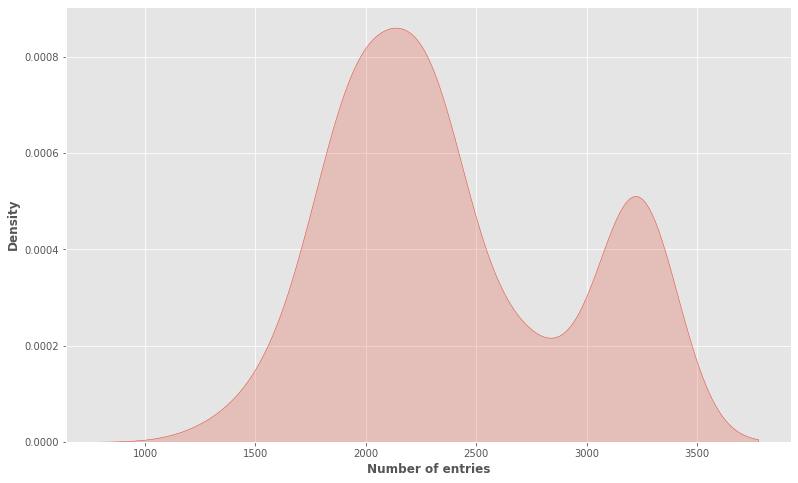

In [13]:
number_of_entries = []
countries = df.Country.drop_duplicates().to_list()
for con in countries:
    number_of_entries.append(len(df[df.Country == con]))

plt.figure(figsize=(13, 8))
sns.kdeplot(number_of_entries, fill=True)
plt.xlabel('Number of entries')

In [14]:
number_of_entries = np.array(number_of_entries)
number_min = number_of_entries.min()
stand_df = df[df.Country == countries[0]]
stand_df = stand_df[len(stand_df) - number_min::]
for i in range(1, len(countries)):
    index = df[df.Country == countries[i]]
    index = index[len(index) - number_min::]
    stand_df = stand_df.append(index)

Text(0.5, 0, 'Number of Entries')

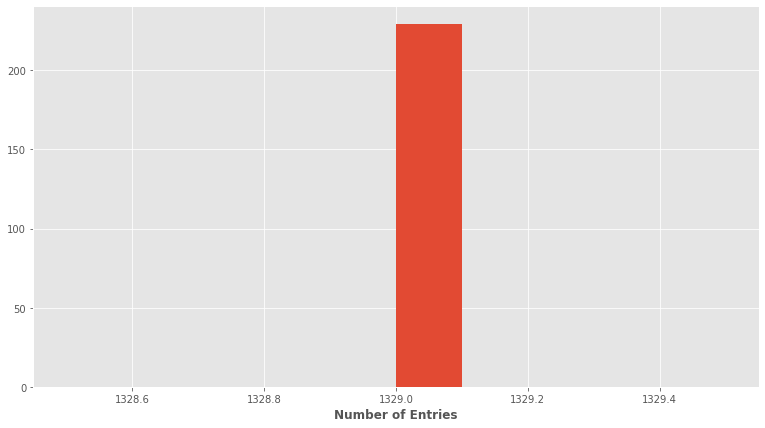

In [15]:
number_of_entries = []
for con in countries:
    number_of_entries.append(len(stand_df[stand_df.Country == con]))

plt.figure(figsize=(13, 7))
plt.hist(number_of_entries)
plt.xlabel('Number of Entries')

<AxesSubplot:xlabel='Continent', ylabel='count'>

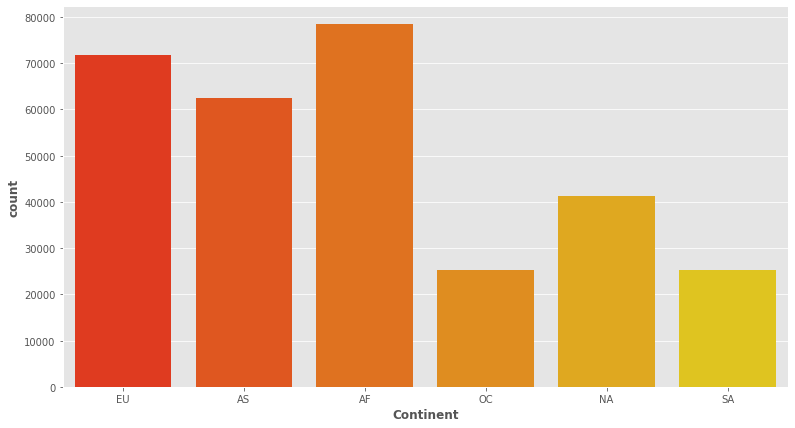

In [19]:
plt.figure(figsize=(13, 7))
sns.countplot(x=stand_df.Continent, palette='autumn')

In [20]:
three_pop_df = stand_df[(stand_df.Continent == 'EU')|(stand_df.Continent == 'AS')|(stand_df.Continent == 'AF')]
three_pop_label = three_pop_df.reset_index().drop('index', axis=1)
year_div = int(len(three_pop_label) / number_min)
labels = []
for i in range(0, year_div):
    labels.append(three_pop_label.loc[i * number_min:(i + 1) * number_min].Continent.to_list()[0])

In [21]:
def city(data):
    cities = data.Country.drop_duplicates().to_list()
    city = np.random.choice(cities)
    return data[data.Country == city]

def plot_data(data, color='navy'):
    data = data.reset_index().drop(columns='index')
    city = data_city[0:1].Country.to_list()[0]
    index_to_plot = np.linspace(0, len(data) - 1, 4).astype(int)
    indexes = data.index.to_list()
    x = data.dt
    y = data.AverageTemperature
    sns.lineplot(x = indexes, y = y, label = city, color = color)
    plt.xticks(index_to_plot, x.loc[index_to_plot])
    plt.legend(fontsize=15)
    plt.xlabel('Date', fontsize=22)
    plt.ylabel('Temperature', fontsize=22)

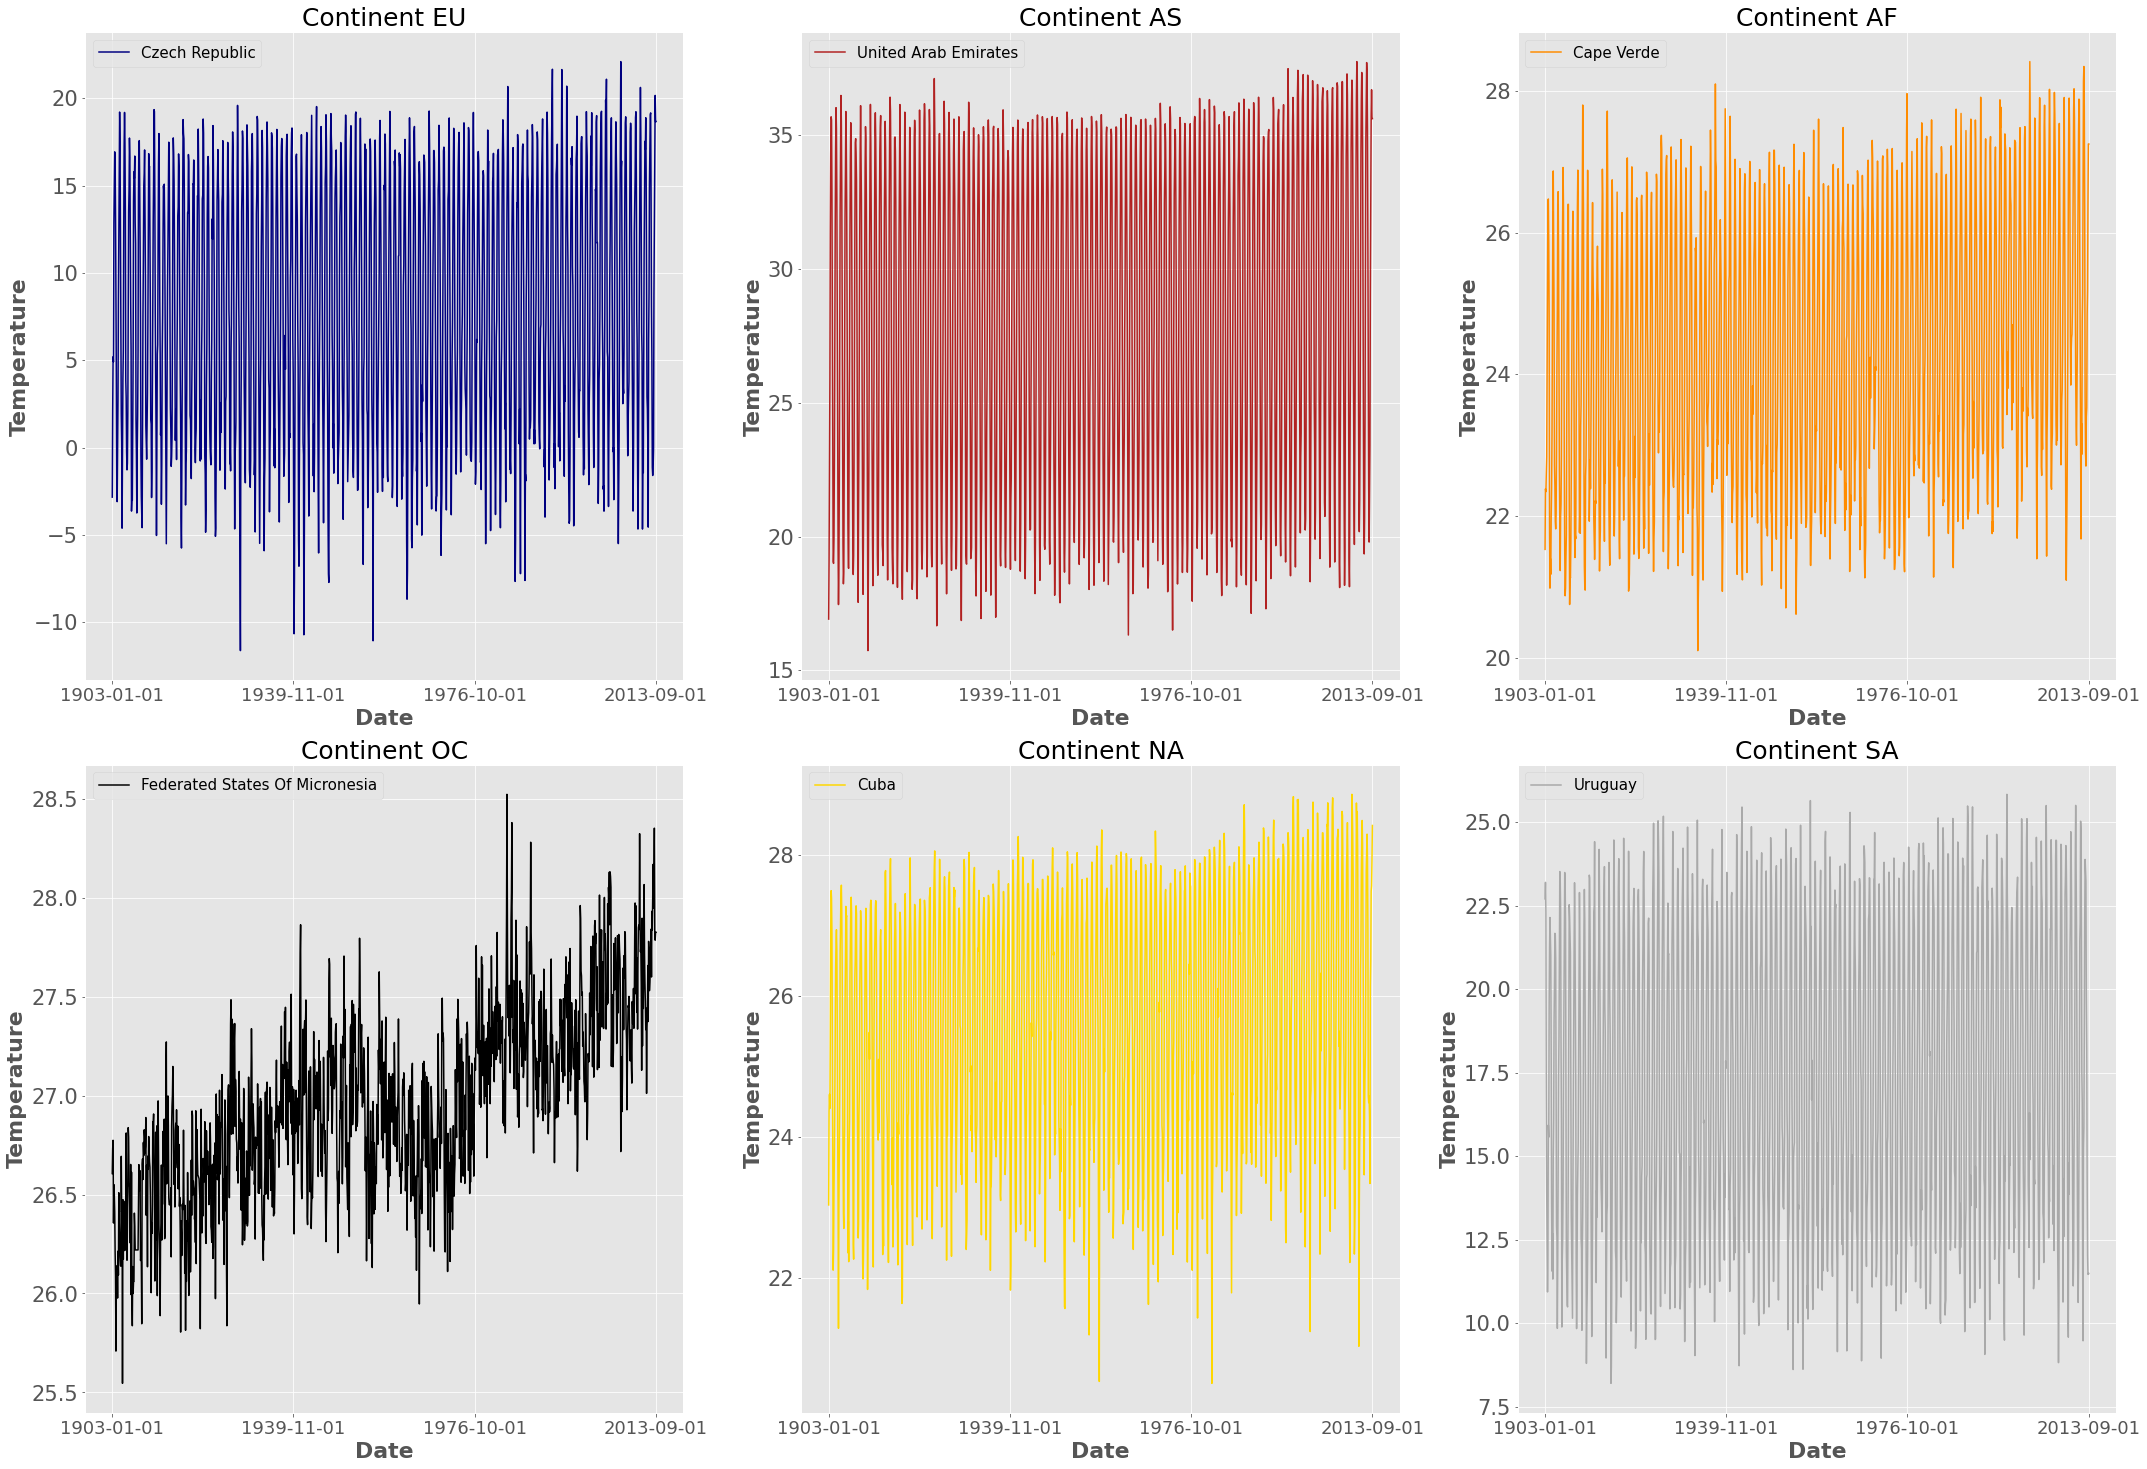

In [22]:
continents = stand_df.Continent.drop_duplicates().to_list()
data = []
for cont in continents:
    data.append(stand_df[stand_df.Continent == cont])
    
i = 1
colors = ['navy', 'firebrick', 'darkorange', 'k', 'gold', 'darkgrey', 'purple']

plt.figure(figsize = (30, 30))
for cont in data:
    plt.subplot(3, 3, i)
    data_city = city(cont)
    continent = data_city.Continent.to_list()[0]
    plt.title(f"Continent {continent}", fontsize = 25)
    plot_data(data_city, color = colors[i - 1])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=21)
    i += 1
plt.tight_layout()

In [23]:
labels = np.array(labels)
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(labels)
labels = np.array(label_encoder.transform(labels))
stand_df = stand_df.reset_index().drop(columns='index')
len_df = len(stand_df)
len_train_country = int((len_df / number_min) * 0.8)
len_train = int(len_train_country * number_min)
stand_df_train_data = stand_df[0:len_train]
stand_df_test_data = stand_df[len_train:len_df]

len_train_country = 128

x = np.array(stand_df.AverageTemperature)
y = labels
x = x.reshape(number_min, int(len(x) / number_min))
idx = np.arange(0, len(y), 1)
idx_random = np.random.choice(idx, len(y))
x_train, y_train = x[idx_random][0:len_train_country], y[idx_random][0:len_train_country]
x_test, y_test = x[idx_random][len_train_country:len(y)], y[idx_random][len_train_country:len(y)]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
num_classes = 3

In [24]:
def model_CNN(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    conv1 = keras.layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same')(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    
    conv2 = keras.layers.Conv1D(filters = 128, kernel_size = 3, padding = 'same')(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    
    conv3 = keras.layers.Conv1D(filters = 256, kernel_size = 3, padding = 'same')(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    output_layer = keras.layers.Dense(num_classes, activation = 'softmax')(gap)
    
    return keras.models.Model(inputs = input_layer, outputs = output_layer)

model = model_CNN(input_shape=x_train.shape[1:])

In [25]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 229, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 229, 64)           256       
_________________________________________________________________
batch_normalization (BatchNo (None, 229, 64)           256       
_________________________________________________________________
re_lu (ReLU)                 (None, 229, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 229, 64)           12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 229, 64)           256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 229, 64)          

In [26]:
epochs = 500
batch_size = 5
callbacks = [
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitors='loss'),
    keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(monitor='loss', patience=50, verbose=1),
]

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/500
26/26 [==============================] - 2s 93ms/step - loss: 1.1412 - sparse_categorical_accuracy: 0.3516
Epoch 2/500
26/26 [==============================] - 0s 8ms/step - loss: 1.1359 - sparse_categorical_accuracy: 0.3281
Epoch 3/500
26/26 [==============================] - 0s 9ms/step - loss: 1.0949 - sparse_categorical_accuracy: 0.4141
Epoch 4/500
26/26 [==============================] - 0s 8ms/step - loss: 1.0632 - sparse_categorical_accuracy: 0.4297
Epoch 5/500
26/26 [==============================] - 0s 9ms/step - loss: 1.0749 - sparse_categorical_accuracy: 0.3984
Epoch 6/500
26/26 [==============================] - 0s 9ms/step - loss: 1.1254 - sparse_categorical_accuracy: 0.3828
Epoch 7/500
26/26 [==============================] - 0s 8ms/step - loss: 1.1059 - sparse_categorical_accuracy: 0.3438
Epoch 8/500
26/26 [==============================] - 0s 8ms/step - loss: 1.0908 - sparse_categorical_accuracy: 0.3906
Epoch 9/500
26/26 [==============================] - 0s

26/26 [==============================] - 0s 16ms/step - loss: 1.0443 - sparse_categorical_accuracy: 0.4141
Epoch 29/500
26/26 [==============================] - 0s 12ms/step - loss: 1.0416 - sparse_categorical_accuracy: 0.4609
Epoch 30/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0481 - sparse_categorical_accuracy: 0.5000
Epoch 31/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0151 - sparse_categorical_accuracy: 0.4844
Epoch 32/500
26/26 [==============================] - 0s 8ms/step - loss: 1.0536 - sparse_categorical_accuracy: 0.4766
Epoch 33/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0221 - sparse_categorical_accuracy: 0.4609
Epoch 34/500
26/26 [==============================] - 0s 10ms/step - loss: 1.0308 - sparse_categorical_accuracy: 0.4844
Epoch 35/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0393 - sparse_categorical_accuracy: 0.4531
Epoch 36/500
26/26 [==============================] - 0s 1

26/26 [==============================] - 0s 7ms/step - loss: 1.0164 - sparse_categorical_accuracy: 0.5000
Epoch 56/500
26/26 [==============================] - 0s 9ms/step - loss: 0.9922 - sparse_categorical_accuracy: 0.4766
Epoch 57/500
26/26 [==============================] - 0s 10ms/step - loss: 0.9771 - sparse_categorical_accuracy: 0.5234
Epoch 58/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0192 - sparse_categorical_accuracy: 0.4688
Epoch 59/500
26/26 [==============================] - 0s 8ms/step - loss: 0.9732 - sparse_categorical_accuracy: 0.4922
Epoch 60/500
26/26 [==============================] - 0s 10ms/step - loss: 1.0081 - sparse_categorical_accuracy: 0.4609
Epoch 61/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0051 - sparse_categorical_accuracy: 0.4609
Epoch 62/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9738 - sparse_categorical_accuracy: 0.5000
Epoch 63/500
26/26 [==============================] - 0s 9m

26/26 [==============================] - 0s 7ms/step - loss: 0.9481 - sparse_categorical_accuracy: 0.5703
Epoch 84/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9512 - sparse_categorical_accuracy: 0.5312
Epoch 85/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0165 - sparse_categorical_accuracy: 0.4453
Epoch 86/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9579 - sparse_categorical_accuracy: 0.5078
Epoch 87/500
26/26 [==============================] - 0s 9ms/step - loss: 1.0069 - sparse_categorical_accuracy: 0.4609
Epoch 88/500
26/26 [==============================] - 0s 11ms/step - loss: 0.9468 - sparse_categorical_accuracy: 0.5625
Epoch 89/500
26/26 [==============================] - 0s 6ms/step - loss: 0.9647 - sparse_categorical_accuracy: 0.5000
Epoch 90/500
26/26 [==============================] - 0s 8ms/step - loss: 0.9448 - sparse_categorical_accuracy: 0.5703
Epoch 91/500
26/26 [==============================] - 0s 8ms

26/26 [==============================] - 0s 8ms/step - loss: 0.9289 - sparse_categorical_accuracy: 0.5781
Epoch 111/500
26/26 [==============================] - 0s 10ms/step - loss: 0.9468 - sparse_categorical_accuracy: 0.5391
Epoch 112/500
26/26 [==============================] - 0s 8ms/step - loss: 0.9568 - sparse_categorical_accuracy: 0.5859
Epoch 113/500
26/26 [==============================] - 0s 11ms/step - loss: 0.9694 - sparse_categorical_accuracy: 0.4844
Epoch 114/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9301 - sparse_categorical_accuracy: 0.5312
Epoch 115/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9406 - sparse_categorical_accuracy: 0.5469
Epoch 116/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9438 - sparse_categorical_accuracy: 0.5469
Epoch 117/500
26/26 [==============================] - 0s 9ms/step - loss: 0.9368 - sparse_categorical_accuracy: 0.5703
Epoch 118/500
26/26 [==============================]

Epoch 138/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8724 - sparse_categorical_accuracy: 0.5859
Epoch 139/500
26/26 [==============================] - 0s 7ms/step - loss: 0.9184 - sparse_categorical_accuracy: 0.6016
Epoch 140/500
26/26 [==============================] - 0s 7ms/step - loss: 0.8645 - sparse_categorical_accuracy: 0.5938
Epoch 141/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8890 - sparse_categorical_accuracy: 0.5859
Epoch 142/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8893 - sparse_categorical_accuracy: 0.5547
Epoch 143/500
26/26 [==============================] - 0s 7ms/step - loss: 0.8905 - sparse_categorical_accuracy: 0.5547
Epoch 144/500
26/26 [==============================] - 0s 8ms/step - loss: 0.9030 - sparse_categorical_accuracy: 0.5781
Epoch 145/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8812 - sparse_categorical_accuracy: 0.5859
Epoch 146/500
26/26 [===================

26/26 [==============================] - 0s 8ms/step - loss: 0.8663 - sparse_categorical_accuracy: 0.5938
Epoch 166/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8568 - sparse_categorical_accuracy: 0.5781
Epoch 167/500
26/26 [==============================] - 0s 9ms/step - loss: 0.9283 - sparse_categorical_accuracy: 0.5312
Epoch 168/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8924 - sparse_categorical_accuracy: 0.5312
Epoch 169/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8784 - sparse_categorical_accuracy: 0.5781
Epoch 170/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8303 - sparse_categorical_accuracy: 0.6172
Epoch 171/500
26/26 [==============================] - 0s 9ms/step - loss: 0.9039 - sparse_categorical_accuracy: 0.5625
Epoch 172/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8375 - sparse_categorical_accuracy: 0.6016
Epoch 173/500
26/26 [==============================] -

26/26 [==============================] - 0s 9ms/step - loss: 0.8621 - sparse_categorical_accuracy: 0.5938
Epoch 193/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8553 - sparse_categorical_accuracy: 0.6250
Epoch 194/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8397 - sparse_categorical_accuracy: 0.6641
Epoch 195/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8537 - sparse_categorical_accuracy: 0.5859
Epoch 196/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8349 - sparse_categorical_accuracy: 0.5859
Epoch 197/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8625 - sparse_categorical_accuracy: 0.6328
Epoch 198/500
26/26 [==============================] - 0s 10ms/step - loss: 0.8033 - sparse_categorical_accuracy: 0.6562
Epoch 199/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8325 - sparse_categorical_accuracy: 0.6250
Epoch 200/500
26/26 [==============================] 

26/26 [==============================] - 0s 9ms/step - loss: 0.8409 - sparse_categorical_accuracy: 0.6094
Epoch 220/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8545 - sparse_categorical_accuracy: 0.5781
Epoch 221/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8307 - sparse_categorical_accuracy: 0.6094
Epoch 222/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8508 - sparse_categorical_accuracy: 0.5938
Epoch 223/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8545 - sparse_categorical_accuracy: 0.6016
Epoch 224/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7980 - sparse_categorical_accuracy: 0.6094
Epoch 225/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8223 - sparse_categorical_accuracy: 0.6328
Epoch 226/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7974 - sparse_categorical_accuracy: 0.6562
Epoch 227/500
26/26 [==============================] -

26/26 [==============================] - 0s 7ms/step - loss: 0.8177 - sparse_categorical_accuracy: 0.6250
Epoch 247/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8387 - sparse_categorical_accuracy: 0.5703
Epoch 248/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8160 - sparse_categorical_accuracy: 0.6250
Epoch 249/500
26/26 [==============================] - 0s 8ms/step - loss: 0.9003 - sparse_categorical_accuracy: 0.6016
Epoch 250/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8362 - sparse_categorical_accuracy: 0.6406
Epoch 251/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7900 - sparse_categorical_accuracy: 0.6641
Epoch 252/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7918 - sparse_categorical_accuracy: 0.6719
Epoch 253/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7802 - sparse_categorical_accuracy: 0.7031
Epoch 254/500
26/26 [==============================] -

26/26 [==============================] - 0s 8ms/step - loss: 0.8040 - sparse_categorical_accuracy: 0.5781
Epoch 274/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8118 - sparse_categorical_accuracy: 0.6328
Epoch 275/500
26/26 [==============================] - 0s 10ms/step - loss: 0.7735 - sparse_categorical_accuracy: 0.6719
Epoch 276/500
26/26 [==============================] - 0s 8ms/step - loss: 0.8233 - sparse_categorical_accuracy: 0.6250
Epoch 277/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8293 - sparse_categorical_accuracy: 0.6250
Epoch 278/500
26/26 [==============================] - 0s 9ms/step - loss: 0.8399 - sparse_categorical_accuracy: 0.5469
Epoch 279/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7619 - sparse_categorical_accuracy: 0.6797
Epoch 280/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7710 - sparse_categorical_accuracy: 0.6250
Epoch 281/500
26/26 [==============================] 

26/26 [==============================] - 0s 9ms/step - loss: 0.7938 - sparse_categorical_accuracy: 0.6328
Epoch 301/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7433 - sparse_categorical_accuracy: 0.6641
Epoch 302/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7479 - sparse_categorical_accuracy: 0.7266
Epoch 303/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7482 - sparse_categorical_accuracy: 0.6875
Epoch 304/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7585 - sparse_categorical_accuracy: 0.6953
Epoch 305/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7429 - sparse_categorical_accuracy: 0.7188
Epoch 306/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7930 - sparse_categorical_accuracy: 0.6562
Epoch 307/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7289 - sparse_categorical_accuracy: 0.7109
Epoch 308/500
26/26 [==============================] -

26/26 [==============================] - 0s 8ms/step - loss: 0.7877 - sparse_categorical_accuracy: 0.6406
Epoch 328/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7995 - sparse_categorical_accuracy: 0.6562
Epoch 329/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7615 - sparse_categorical_accuracy: 0.6484
Epoch 330/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7280 - sparse_categorical_accuracy: 0.7031
Epoch 331/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7939 - sparse_categorical_accuracy: 0.6875
Epoch 332/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7661 - sparse_categorical_accuracy: 0.6484
Epoch 333/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7505 - sparse_categorical_accuracy: 0.6484
Epoch 334/500
26/26 [==============================] - 0s 10ms/step - loss: 0.7542 - sparse_categorical_accuracy: 0.6328
Epoch 335/500
26/26 [==============================] 

26/26 [==============================] - 0s 7ms/step - loss: 0.7733 - sparse_categorical_accuracy: 0.6719
Epoch 355/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7481 - sparse_categorical_accuracy: 0.6484
Epoch 356/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7760 - sparse_categorical_accuracy: 0.6719
Epoch 357/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7692 - sparse_categorical_accuracy: 0.6719
Epoch 358/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7742 - sparse_categorical_accuracy: 0.6953
Epoch 359/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7744 - sparse_categorical_accuracy: 0.6719
Epoch 360/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7629 - sparse_categorical_accuracy: 0.6719
Epoch 361/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7303 - sparse_categorical_accuracy: 0.7109
Epoch 362/500
26/26 [==============================] -

26/26 [==============================] - 0s 7ms/step - loss: 0.7590 - sparse_categorical_accuracy: 0.6562
Epoch 382/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7651 - sparse_categorical_accuracy: 0.7109
Epoch 383/500
26/26 [==============================] - 0s 10ms/step - loss: 0.7249 - sparse_categorical_accuracy: 0.6719
Epoch 384/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7441 - sparse_categorical_accuracy: 0.6875
Epoch 385/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7562 - sparse_categorical_accuracy: 0.6641
Epoch 386/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7371 - sparse_categorical_accuracy: 0.6484
Epoch 387/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7770 - sparse_categorical_accuracy: 0.6328
Epoch 388/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7240 - sparse_categorical_accuracy: 0.7188
Epoch 389/500
26/26 [==============================] 

26/26 [==============================] - 0s 8ms/step - loss: 0.7703 - sparse_categorical_accuracy: 0.6875
Epoch 409/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7551 - sparse_categorical_accuracy: 0.6875
Epoch 410/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7671 - sparse_categorical_accuracy: 0.6562
Epoch 411/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7240 - sparse_categorical_accuracy: 0.6875
Epoch 412/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7431 - sparse_categorical_accuracy: 0.7344
Epoch 413/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7709 - sparse_categorical_accuracy: 0.6719
Epoch 414/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7357 - sparse_categorical_accuracy: 0.6953
Epoch 415/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7383 - sparse_categorical_accuracy: 0.6953
Epoch 416/500
26/26 [==============================] -

26/26 [==============================] - 0s 7ms/step - loss: 0.7120 - sparse_categorical_accuracy: 0.6953
Epoch 436/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7064 - sparse_categorical_accuracy: 0.7266
Epoch 437/500
26/26 [==============================] - 0s 9ms/step - loss: 0.7067 - sparse_categorical_accuracy: 0.6953
Epoch 438/500
26/26 [==============================] - 0s 11ms/step - loss: 0.7536 - sparse_categorical_accuracy: 0.6641
Epoch 439/500
26/26 [==============================] - 0s 8ms/step - loss: 0.7426 - sparse_categorical_accuracy: 0.6641
Epoch 440/500
26/26 [==============================] - 0s 6ms/step - loss: 0.7222 - sparse_categorical_accuracy: 0.7031
Epoch 441/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7126 - sparse_categorical_accuracy: 0.7188
Epoch 00441: early stopping


In [27]:
predictions = model.predict(x_test)
results = []
for prediction in predictions:
    results.append(prediction.argmax())
print(f"Accuracy on test data is {accuracy_score(results, y_test)}")

Accuracy on test data is 0.625


In [28]:
print(classification_report(results, y_test))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.75      0.60      0.67        10
           2       0.57      0.89      0.70         9

    accuracy                           0.62        32
   macro avg       0.64      0.65      0.63        32
weighted avg       0.64      0.62      0.62        32

